In [29]:
import pandas as pd
import sqlite3

In [30]:
conn = sqlite3.connect('Jobs.db')

In [33]:
%reload_ext sql

In [35]:
%sql sqlite:///Jobs.db

In [38]:
%%sql drop table IF EXISTS CIENCIA_DE_DADOS_SALARIO;
drop table IF EXISTS CIENCIA_DE_DADOS_VAGA_EMEPREGO;

 * sqlite:///jobs.db
Done.
Done.


[]

In [39]:
data_ciencia_de_dados_jobs = pd.read_csv('C:\\Users\\Mathe\\Downloads\\archive\\jobs_in_data.csv')

In [40]:
data_ciencia_de_dados_jobs

work_year                 job_title                    job_category  \
0          2023      Data DevOps Engineer                Data Engineering   
1          2023            Data Architect  Data Architecture and Modeling   
2          2023            Data Architect  Data Architecture and Modeling   
3          2023            Data Scientist       Data Science and Research   
4          2023            Data Scientist       Data Science and Research   
...         ...                       ...                             ...   
9350       2021           Data Specialist    Data Management and Strategy   
9351       2020            Data Scientist       Data Science and Research   
9352       2021  Principal Data Scientist       Data Science and Research   
9353       2020            Data Scientist       Data Science and Research   
9354       2020     Business Data Analyst                   Data Analysis   

     salary_currency  salary  salary_in_usd employee_residence  \
0                EUR   88000          95012            Germany   
1                USD  186000         186000      United States   
2                USD   81800          81800      United States   
3                USD  212000         212000      United States   
4                USD   93300          93300      United States   
...              ...     ...            ...                ...   
9350             USD  165000         165000      United States   
9351             USD  412000         412000      United States   
9352             USD  151000         151000      United States   
9353             USD  105000         105000      United States   
9354             USD  100000         100000      United States   

     experience_level employment_type work_setting company_location  \
0           Mid-level       Full-time       Hybrid          Germany   
1              Senior       Full-time    In-person    United States   
2              Senior       Full-time    In-person    United States   
3              Senior       Full-time    In-person    United States   
4              Senior       Full-time    In-person    United States   
...               ...             ...          ...              ...   
9350           Senior       Full-time       Remote    United States   
9351           Senior       Full-time       Remote    United States   
9352        Mid-level       Full-time       Remote    United States   
9353      Entry-level       Full-time       Remote    United States   
9354      Entry-level        Contract       Remote    United States   

     company_size  
0               L  
1               M  
2               M  
3               M  
4               M  
...           ...  
9350            L  
9351            L  
9352            L  
9353            S  
9354            L  

[9355 rows x 12 columns]

In [42]:
data_ciencia_de_dados_jobs.columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

In [43]:
df_novo = ['salary_currency', 'salary',
       'salary_in_usd']

In [44]:
data_ciencia_de_dados_salary = data_ciencia_de_dados_jobs.filter(df_novo)

In [45]:
data_ciencia_de_dados_salary

salary_currency  salary  salary_in_usd
0                EUR   88000          95012
1                USD  186000         186000
2                USD   81800          81800
3                USD  212000         212000
4                USD   93300          93300
...              ...     ...            ...
9350             USD  165000         165000
9351             USD  412000         412000
9352             USD  151000         151000
9353             USD  105000         105000
9354             USD  100000         100000

[9355 rows x 3 columns]

In [46]:
data_ciencia_de_dados_jobs['id_salario'] = ''

In [47]:
data_ciencia_de_dados_salary['id_salario'] = ''

In [49]:
data_ciencia_de_dados_jobs.iloc[-1].values

array([2020, 'Business Data Analyst', 'Data Analysis', 'USD', 100000,
       100000, 'United States', 'Entry-level', 'Contract', 'Remote',
       'United States', 'L', ''], dtype=object)

In [51]:
for row in data_ciencia_de_dados_jobs:
    data_ciencia_de_dados_jobs.loc['id_salary'] =+ 1

In [59]:
del data_ciencia_de_dados_jobs['salary_currency']

In [60]:
del data_ciencia_de_dados_jobs['salary']
del data_ciencia_de_dados_jobs['salary_in_usd']

In [61]:
data_ciencia_de_dados_jobs

work_year                 job_title  \
0               2023      Data DevOps Engineer   
1               2023            Data Architect   
2               2023            Data Architect   
3               2023            Data Scientist   
4               2023            Data Scientist   
...              ...                       ...   
9351            2020            Data Scientist   
9352            2021  Principal Data Scientist   
9353            2020            Data Scientist   
9354            2020     Business Data Analyst   
id_salary          1                         1   

                             job_category employee_residence experience_level  \
0                        Data Engineering            Germany        Mid-level   
1          Data Architecture and Modeling      United States           Senior   
2          Data Architecture and Modeling      United States           Senior   
3               Data Science and Research      United States           Senior   
4               Data Science and Research      United States           Senior   
...                                   ...                ...              ...   
9351            Data Science and Research      United States           Senior   
9352            Data Science and Research      United States        Mid-level   
9353            Data Science and Research      United States      Entry-level   
9354                        Data Analysis      United States      Entry-level   
id_salary                               1                  1                1   

          employment_type work_setting company_location company_size  \
0               Full-time       Hybrid          Germany            L   
1               Full-time    In-person    United States            M   
2               Full-time    In-person    United States            M   
3               Full-time    In-person    United States            M   
4               Full-time    In-person    United States            M   
...                   ...          ...              ...          ...   
9351            Full-time       Remote    United States            L   
9352            Full-time       Remote    United States            L   
9353            Full-time       Remote    United States            S   
9354             Contract       Remote    United States            L   
id_salary               1            1                1            1   

          id_salario  
0                     
1                     
2                     
3                     
4                     
...              ...  
9351                  
9352                  
9353                  
9354                  
id_salary          1  

[9356 rows x 10 columns]

In [70]:
indice = 0
valor_id = 1
while indice<9356:
    data_ciencia_de_dados_jobs.loc[indice, 'id_salario'] = valor_id
    indice = indice + 1
    valor_id = valor_id + 1

In [71]:
data_ciencia_de_dados_jobs

work_year                 job_title                    job_category  \
0        2023.0      Data DevOps Engineer                Data Engineering   
1        2023.0            Data Architect  Data Architecture and Modeling   
2        2023.0            Data Architect  Data Architecture and Modeling   
3        2023.0            Data Scientist       Data Science and Research   
4        2023.0            Data Scientist       Data Science and Research   
...         ...                       ...                             ...   
9351     2020.0            Data Scientist       Data Science and Research   
9352     2021.0  Principal Data Scientist       Data Science and Research   
9353     2020.0            Data Scientist       Data Science and Research   
9354     2020.0     Business Data Analyst                   Data Analysis   
9355        NaN                       NaN                             NaN   

     employee_residence experience_level employment_type work_setting  \
0               Germany        Mid-level       Full-time       Hybrid   
1         United States           Senior       Full-time    In-person   
2         United States           Senior       Full-time    In-person   
3         United States           Senior       Full-time    In-person   
4         United States           Senior       Full-time    In-person   
...                 ...              ...             ...          ...   
9351      United States           Senior       Full-time       Remote   
9352      United States        Mid-level       Full-time       Remote   
9353      United States      Entry-level       Full-time       Remote   
9354      United States      Entry-level        Contract       Remote   
9355                NaN              NaN             NaN          NaN   

     company_location company_size id_salario  
0             Germany            L          1  
1       United States            M          2  
2       United States            M          3  
3       United States            M          4  
4       United States            M          5  
...               ...          ...        ...  
9351    United States            L       9352  
9352    United States            L       9353  
9353    United States            S       9354  
9354    United States            L       9355  
9355              NaN          NaN       9356  

[9356 rows x 10 columns]

In [72]:
indice = 0
valor_id = 1
while indice<9356:
    data_ciencia_de_dados_salary.loc[indice, 'id_salario'] = valor_id
    indice = indice + 1
    valor_id = valor_id + 1

In [73]:
data_ciencia_de_dados_salary

salary_currency    salary  salary_in_usd id_salario
0                EUR   88000.0        95012.0          1
1                USD  186000.0       186000.0          2
2                USD   81800.0        81800.0          3
3                USD  212000.0       212000.0          4
4                USD   93300.0        93300.0          5
...              ...       ...            ...        ...
9351             USD  412000.0       412000.0       9352
9352             USD  151000.0       151000.0       9353
9353             USD  105000.0       105000.0       9354
9354             USD  100000.0       100000.0       9355
9355             NaN       NaN            NaN       9356

[9356 rows x 4 columns]

In [76]:
data_ciencia_de_dados_jobs.to_sql('CIENCIA_DE_DADOS_VAGA_EMPREGO', conn, if_exists='replace', index=False)
data_ciencia_de_dados_salary.to_sql('CIENCIA_DE_DADOS_SALARIO', conn, if_exists='replace', index=False)

9356

In [77]:
%sql SELECT * FROM CIENCIA_DE_DADOS_VAGA_EMPREGO

 * sqlite:///jobs.db
Done.


[(2023.0, 'Data DevOps Engineer', 'Data Engineering', 'Germany', 'Mid-level', 'Full-time', 'Hybrid', 'Germany', 'L', 1),
 (2023.0, 'Data Architect', 'Data Architecture and Modeling', 'United States', 'Senior', 'Full-time', 'In-person', 'United States', 'M', 2),
 (2023.0, 'Data Architect', 'Data Architecture and Modeling', 'United States', 'Senior', 'Full-time', 'In-person', 'United States', 'M', 3),
 (2023.0, 'Data Scientist', 'Data Science and Research', 'United States', 'Senior', 'Full-time', 'In-person', 'United States', 'M', 4),
 (2023.0, 'Data Scientist', 'Data Science and Research', 'United States', 'Senior', 'Full-time', 'In-person', 'United States', 'M', 5),
 (2023.0, 'Data Scientist', 'Data Science and Research', 'United States', 'Senior', 'Full-time', 'Remote', 'United States', 'M', 6),
 (2023.0, 'Data Scientist', 'Data Science and Research', 'United States', 'Senior', 'Full-time', 'Remote', 'United States', 'M', 7),
 (2023.0, 'Machine Learning Researcher', 'Machine Learning and AI', 'United States', 'Mid-level', 'Full-time', 'In-person', 'United States', 'M', 8),
 (2023.0, 'Machine Learning Researcher', 'Machine Learning and AI', 'United States', 'Mid-level', 'Full-time', 'In-person', 'United States', 'M', 9),
 (2023.0, 'Data Engineer', 'Data Engineering', 'United States', 'Executive', 'Full-time', 'Remote', 'United States', 'M', 10),
 (2023.0, 'Data Engineer', 'Data Engineering', 'United States', 'Executive', 'Full-time', 'Remote', 'United States', 'M', 11),
 (2023.0, 'Machine Learning Engineer', 'Machine Learning and AI', 'United States', 'Senior', 'Full-time', 'In-person', 'United States', 'M', 12),
 (2023.0, 'Machine Learning Engineer', 'Machine Learning and AI', 'United States', 'Senior', 'Full-time', 'In-person', 'United States', 'M', 13),
 (2023.0, 'Data Scientist', 'Data Science and Research', 'United Kingdom', 'Mid-level', 'Full-time', 'In-person', 'United Kingdom', 'M', 14),
 (2023.0, 'Data Scientist', 'Data Science and Research', 'United Kingdom', 'Mid-level', 'Full-time', 'In-person', 'United Kingdom', 'M', 15),
 (2023.0, 'Data Analyst', 'Data Analysis', 'United States', 'Entry-level', 'Full-time', 'In-person', 'United States', 'M', 16),
 (2023.0, 'Data Analyst', 'Data Analysis', 'United States', 'Entry-level', 'Full-time', 'In-person', 'United States', 'M', 17),
 (2023.0, 'Data Scientist', 'Data Science and Research', 'United States', 'Senior', 'Full-time', 'In-person', 'United States', 'M', 18),
 (2023.0, 'Data Scientist', 'Data Science and Research', 'United States', 'Senior', 'Full-time', 'In-person', 'United States', 'M', 19),
 (2023.0, 'Analytics Engineer', 'Leadership and Management', 'United States', 'Mid-level', 'Full-time', 'In-person', 'United States', 'M', 20),
 (2023.0, 'Analytics Engineer', 'Leadership and Management', 'United States', 'Mid-level', 'Full-time', 'In-person', 'United States', 'M', 21),
 (2023.0, 'Machine Learning Engineer', 'Machine Learning and AI', 'United States', 'Mid-level', 'Full-time', 'In-person', 'United States', 'M', 22),
 (2023.0, 'Machine Learning Engineer', 'Machine Learning and AI', 'United States', 'Mid-level', 'Full-time', 'In-person', 'United States', 'M', 23),
 (2023.0, 'Data Analyst', 'Data Analysis', 'United States', 'Mid-level', 'Full-time', 'In-person', 'United States', 'M', 24),
 (2023.0, 'Data Analyst', 'Data Analysis', 'United States', 'Mid-level', 'Full-time', 'In-person', 'United States', 'M', 25),
 (2023.0, 'Machine Learning Engineer', 'Machine Learning and AI', 'United States', 'Senior', 'Full-time', 'In-person', 'United States', 'M', 26),
 (2023.0, 'Machine Learning Engineer', 'Machine Learning and AI', 'United States', 'Senior', 'Full-time', 'In-person', 'United States', 'M', 27),
 (2023.0, 'Applied Scientist', 'Data Science and Research', 'United States', 'Mid-level', 'Full-time', 'In-person', 'United States', 'L', 28),
 (2023.0, 'Applied Scientist', 'Data Science and Research', 'United States', 'Mid-level', 'Full-time', 'In-person', 'United St

In [78]:
%sql SELECT * FROM CIENCIA_DE_DADOS_SALARIO

 * sqlite:///jobs.db
Done.


[('EUR', 88000.0, 95012.0, 1),
 ('USD', 186000.0, 186000.0, 2),
 ('USD', 81800.0, 81800.0, 3),
 ('USD', 212000.0, 212000.0, 4),
 ('USD', 93300.0, 93300.0, 5),
 ('USD', 130000.0, 130000.0, 6),
 ('USD', 100000.0, 100000.0, 7),
 ('USD', 224400.0, 224400.0, 8),
 ('USD', 138700.0, 138700.0, 9),
 ('USD', 210000.0, 210000.0, 10),
 ('USD', 168000.0, 168000.0, 11),
 ('USD', 224400.0, 224400.0, 12),
 ('USD', 138700.0, 138700.0, 13),
 ('GBP', 35000.0, 43064.0, 14),
 ('GBP', 30000.0, 36912.0, 15),
 ('USD', 95000.0, 95000.0, 16),
 ('USD', 75000.0, 75000.0, 17),
 ('USD', 300000.0, 300000.0, 18),
 ('USD', 234000.0, 234000.0, 19),
 ('USD', 140000.0, 140000.0, 20),
 ('USD', 120000.0, 120000.0, 21),
 ('USD', 204500.0, 204500.0, 22),
 ('USD', 142200.0, 142200.0, 23),
 ('USD', 155000.0, 155000.0, 24),
 ('USD', 110000.0, 110000.0, 25),
 ('USD', 266500.0, 266500.0, 26),
 ('USD', 152000.0, 152000.0, 27),
 ('USD', 222200.0, 222200.0, 28),
 ('USD', 136000.0, 136000.0, 29),
 ('USD', 273400.0, 273400.0, 30),
 ('USD', 182200.0, 182200.0, 31),
 ('USD', 167500.0, 167500.0, 32),
 ('USD', 106500.0, 106500.0, 33),
 ('USD', 185900.0, 185900.0, 34),
 ('USD', 129300.0, 129300.0, 35),
 ('USD', 185000.0, 185000.0, 36),
 ('USD', 79600.0, 79600.0, 37),
 ('USD', 122000.0, 122000.0, 38),
 ('USD', 94500.0, 94500.0, 39),
 ('USD', 247300.0, 247300.0, 40),
 ('USD', 139700.0, 139700.0, 41),
 ('USD', 176000.0, 176000.0, 42),
 ('USD', 100000.0, 100000.0, 43),
 ('USD', 204500.0, 204500.0, 44),
 ('USD', 142200.0, 142200.0, 45),
 ('USD', 247600.0, 247600.0, 46),
 ('USD', 127300.0, 127300.0, 47),
 ('USD', 223400.0, 223400.0, 48),
 ('USD', 186200.0, 186200.0, 49),
 ('USD', 167500.0, 167500.0, 50),
 ('USD', 106500.0, 106500.0, 51),
 ('USD', 185900.0, 185900.0, 52),
 ('USD', 129300.0, 129300.0, 53),
 ('USD', 72000.0, 72000.0, 54),
 ('USD', 64000.0, 64000.0, 55),
 ('USD', 179820.0, 179820.0, 56),
 ('USD', 143860.0, 143860.0, 57),
 ('USD', 283050.0, 283050.0, 58),
 ('USD', 188700.0, 188700.0, 59),
 ('USD', 133000.0, 133000.0, 60),
 ('USD', 58400.0, 58400.0, 61),
 ('USD', 141298.0, 141298.0, 62),
 ('USD', 115607.0, 115607.0, 63),
 ('USD', 100000.0, 100000.0, 64),
 ('USD', 75000.0, 75000.0, 65),
 ('USD', 266500.0, 266500.0, 66),
 ('USD', 144400.0, 144400.0, 67),
 ('GBP', 58000.0, 71363.0, 68),
 ('GBP', 45000.0, 55368.0, 69),
 ('USD', 287500.0, 287500.0, 70),
 ('USD', 156000.0, 156000.0, 71),
 ('USD', 90000.0, 90000.0, 72),
 ('USD', 70000.0, 70000.0, 73),
 ('USD', 199000.0, 199000.0, 74),
 ('USD', 162000.0, 162000.0, 75),
 ('USD', 170884.0, 170884.0, 76),
 ('USD', 113923.0, 113923.0, 77),
 ('USD', 184000.0, 184000.0, 78),
 ('USD', 123000.0, 123000.0, 79),
 ('USD', 235750.0, 235750.0, 80),
 ('USD', 174250.0, 174250.0, 81),
 ('USD', 165000.0, 165000.0, 82),
 ('USD', 118800.0, 118800.0, 83),
 ('USD', 225000.0, 225000.0, 84),
 ('USD', 150000.0, 150000.0, 85),
 ('USD', 213900.0, 213900.0, 86),
 ('USD', 116800.0, 116800.0, 87),
 ('USD', 220000.0, 220000.0, 88),
 ('USD', 150000.0, 150000.0, 89),
 ('USD', 150000.0, 150000.0, 90),
 ('USD', 100000.0, 100000.0, 91),
 ('USD', 247500.0, 247500.0, 92),
 ('USD', 172200.0, 172200.0, 93),
 ('USD', 155000.0, 155000.0, 94),
 ('USD', 120000.0, 120000.0, 95),
 ('USD', 226700.0, 226700.0, 96),
 ('USD', 133300.0, 133300.0, 97),
 ('USD', 184000.0, 184000.0, 98),
 ('USD', 123000.0, 123000.0, 99),
 ('USD', 130000.0, 130000.0, 100),
 ('USD', 117000.0, 117000.0, 101),
 ('USD', 160000.0, 160000.0, 102),
 ('USD', 140000.0, 140000.0, 103),
 ('USD', 166000.0, 166000.0, 104),
 ('USD', 73000.0, 73000.0, 105),
 ('USD', 185900.0, 185900.0, 106),
 ('USD', 129300.0, 129300.0, 107),
 ('USD', 130000.0, 130000.0, 108),
 ('USD', 104000.0, 104000.0, 109),
 ('USD', 143000.0, 143000.0, 110),
 ('USD', 116000.0, 116000.0, 111),
 ('USD', 165000.0, 165000.0, 112),
 ('USD', 118800.0, 118800.0, 113),
 ('USD', 220000.0, 220000.0, 114),
 ('USD', 180000.0, 180000.0, 115),
 ('USD', 184000.0, 184000.0, 116),
 ('USD', 123000.0, 123000.0, 117),
 ('USD', 215000.0, 215000.0, 118),
 ('USD', 20000

In [80]:
%sql SELECT AVG(salary_in_usd) FROM CIENCIA_DE_DADOS_SALARIO

 * sqlite:///jobs.db
Done.


[(150299.4955638696,)]

In [86]:
%%sql SELECT CIENCIA_DE_DADOS_VAGA_EMPREGO.job_category
FROM CIENCIA_DE_DADOS_SALARIO
JOIN CIENCIA_DE_DADOS_VAGA_EMPREGO ON CIENCIA_DE_DADOS_SALARIO.id_salario = CIENCIA_DE_DADOS_VAGA_EMPREGO.id_salario
WHERE CIENCIA_DE_DADOS_SALARIO.salary_in_usd > 150300;

 * sqlite:///jobs.db
Done.


[('Data Architecture and Modeling',),
 ('Data Science and Research',),
 ('Machine Learning and AI',),
 ('Data Engineering',),
 ('Data Engineering',),
 ('Machine Learning and AI',),
 ('Data Science and Research',),
 ('Data Science and Research',),
 ('Machine Learning and AI',),
 ('Data Analysis',),
 ('Machine Learning and AI',),
 ('Machine Learning and AI',),
 ('Data Science and Research',),
 ('Machine Learning and AI',),
 ('Machine Learning and AI',),
 ('BI and Visualization',),
 ('Data Engineering',),
 ('BI and Visualization',),
 ('Data Engineering',),
 ('Data Analysis',),
 ('Machine Learning and AI',),
 ('Data Science and Research',),
 ('Data Science and Research',),
 ('Data Science and Research',),
 ('Data Engineering',),
 ('Data Science and Research',),
 ('Leadership and Management',),
 ('Data Science and Research',),
 ('Data Science and Research',),
 ('Machine Learning and AI',),
 ('Data Science and Research',),
 ('Data Science and Research',),
 ('Data Engineering',),
 ('Data Engineering',),
 ('Data Engineering',),
 ('Data Engineering',),
 ('Data Science and Research',),
 ('Data Science and Research',),
 ('Data Science and Research',),
 ('Data Engineering',),
 ('Machine Learning and AI',),
 ('Data Science and Research',),
 ('Machine Learning and AI',),
 ('Machine Learning and AI',),
 ('Data Engineering',),
 ('Data Engineering',),
 ('Data Engineering',),
 ('Data Science and Research',),
 ('Data Science and Research',),
 ('Data Science and Research',),
 ('Data Science and Research',),
 ('Data Science and Research',),
 ('Data Science and Research',),
 ('Data Engineering',),
 ('Data Engineering',),
 ('Data Engineering',),
 ('Data Science and Research',),
 ('Machine Learning and AI',),
 ('Machine Learning and AI',),
 ('Data Science and Research',),
 ('Leadership and Management',),
 ('Leadership and Management',),
 ('Machine Learning and AI',),
 ('Machine Learning and AI',),
 ('Data Engineering',),
 ('Data Engineering',),
 ('Machine Learning and AI',),
 ('Machine Learning and AI',),
 ('Data Science and Research',),
 ('Machine Learning and AI',),
 ('Machine Learning and AI',),
 ('Data Engineering',),
 ('Data Engineering',),
 ('Machine Learning and AI',),
 ('Machine Learning and AI',),
 ('Machine Learning and AI',),
 ('Data Architecture and Modeling',),
 ('Machine Learning and AI',),
 ('Data Engineering',),
 ('Data Science and Research',),
 ('Data Science and Research',),
 ('Data Science and Research',),
 ('Data Engineering',),
 ('Data Engineering',),
 ('Data Engineering',),
 ('Data Architecture and Modeling',),
 ('Data Science and Research',),
 ('Data Science and Research',),
 ('Machine Learning and AI',),
 ('Data Science and Research',),
 ('Data Science and Research',),
 ('Machine Learning and AI',),
 ('Machine Learning and AI',),
 ('Machine Learning and AI',),
 ('Data Science and Research',),
 ('Data Engineering',),
 ('Data Science and Research',),
 ('Data Science and Research',),
 ('Data Engineering',),
 ('Machine Learning and AI',),
 ('Machine Learning and AI',),
 ('Data Science and Research',),
 ('Data Analysis',),
 ('Data Analysis',),
 ('BI and Visualization',),
 ('Data Science and Research',),
 ('Data Science and Research',),
 ('Data Engineering',),
 ('Machine Learning and AI',),
 ('Machine Learning and AI',),
 ('Machine Learning and AI',),
 ('Machine Learning and AI',),
 ('Machine Learning and AI',),
 ('Data Analysis',),
 ('Data Analysis',),
 ('Machine Learning and AI',),
 ('Machine Learning and AI',),
 ('Data Science and Research',),
 ('Data Science and Research',),
 ('Data Science and Research',),
 ('Data Engineering',),
 ('Data Science and Research',),
 ('Machine Learning and AI',),
 ('Data Science and Research',),
 ('Data Science and Research',),
 ('Data Engineering',),
 ('Machine Learning and AI',),
 ('Machine Learning and AI',),
 ('Data Engineering',),
 ('Machine Learning and AI',),
 ('Data Science and Research',),
 ('Data Engineering',),
 ('Machine Learning and AI',),
 ('Machine Learning and AI',),
 ('Data Science

In [87]:
data_ciencia_de_dados_salary.describe()

salary  salary_in_usd
count    9355.000000    9355.000000
mean   149927.981293  150299.495564
std     63608.835387   63177.372024
min     14000.000000   15000.000000
25%    105200.000000  105700.000000
50%    143860.000000  143000.000000
75%    187000.000000  186723.000000
max    450000.000000  450000.000000

In [90]:
data_ciencia_de_dados_salary['salary_in_usd'].idxmax()

9157

In [92]:
%sql SELECT job_category FROM CIENCIA_DE_DADOS_VAGA_EMPREGO WHERE id_salario = 1957

 * sqlite:///jobs.db
Done.


[('Machine Learning and AI',)]

In [99]:
empregos_mais_bem_pagos = %sql SELECT job_category, salary_in_usd FROM CIENCIA_DE_DADOS_VAGA_EMPREGO, CIENCIA_DE_DADOS_SALARIO WHERE CIENCIA_DE_DADOS_VAGA_EMPREGO.id_salario = CIENCIA_DE_DADOS_SALARIO.id_salario ORDER BY salary_in_usd DESC LIMIT 10;

 * sqlite:///jobs.db
Done.


In [100]:
empregos_mais_bem_pagos

[('Data Science and Research', 450000.0),
 ('Data Analysis', 430967.0),
 ('Leadership and Management', 430640.0),
 ('Machine Learning and AI', 423000.0),
 ('Data Science and Research', 416000.0),
 ('Data Science and Research', 412000.0),
 ('Data Science and Research', 405000.0),
 ('Leadership and Management', 405000.0),
 ('Leadership and Management', 399880.0),
 ('Machine Learning and AI', 392000.0)]

In [104]:
print(type(empregos_mais_bem_pagos))

<class 'sql.run.ResultSet'>


In [105]:
data_empregos_mais_bem_pagos = pd.DataFrame(empregos_mais_bem_pagos)

In [101]:
import matplotlib.pyplot as plt

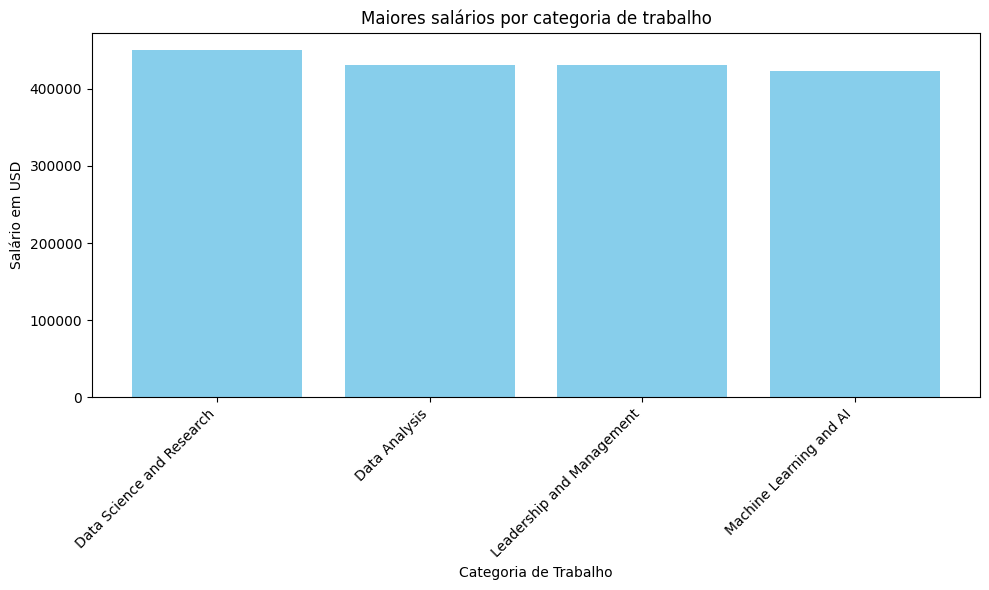

In [106]:
plt.figure(figsize=(10, 6))
plt.bar(data_empregos_mais_bem_pagos['job_category'], data_empregos_mais_bem_pagos['salary_in_usd'], color='skyblue')
plt.xlabel('Categoria de Trabalho')
plt.ylabel('Salário em USD')
plt.title('Maiores salários por categoria de trabalho')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [107]:
paises_mais_bem_pagos = %sql SELECT employee_residence, salary_in_usd FROM CIENCIA_DE_DADOS_VAGA_EMPREGO, CIENCIA_DE_DADOS_SALARIO WHERE CIENCIA_DE_DADOS_VAGA_EMPREGO.id_salario = CIENCIA_DE_DADOS_SALARIO.id_salario ORDER BY salary_in_usd DESC LIMIT 10;

 * sqlite:///jobs.db
Done.


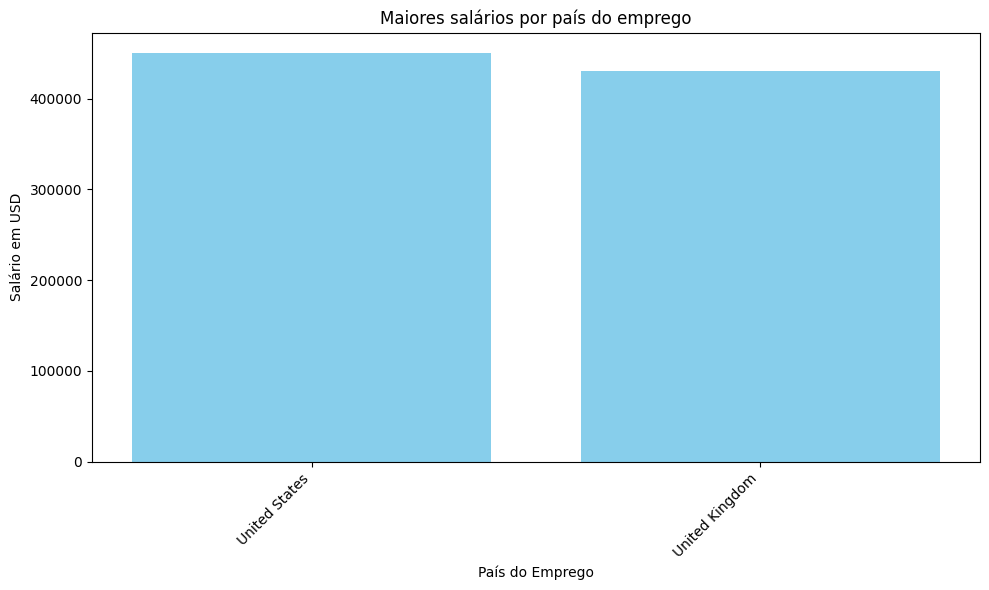

In [109]:
data_paises_mais_bem_pagos = pd.DataFrame(paises_mais_bem_pagos)
plt.figure(figsize=(10, 6))
plt.bar(data_paises_mais_bem_pagos['employee_residence'], data_empregos_mais_bem_pagos['salary_in_usd'], color='skyblue')
plt.xlabel('País do Emprego')
plt.ylabel('Salário em USD')
plt.title('Maiores salários por país do emprego')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()